# Emotions Detection in Text

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns


import neattext.functions as nfx
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC

import lightgbm as lgb



In [2]:
from sklearn.ensemble import VotingClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

In [3]:

df = pd.read_csv("D:\deva\OneDrive\Downloads\Emotion-Detection-in-Text-main\data\emotion_dataset.csv")

In [4]:
df.head()

,Unnamed: 0,Emotion,Text,Clean_Text
0,0,neutral,Why ?,NaN
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...


In [5]:

df['Emotion'].value_counts()

Emotion
joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: count, dtype: int64

<Axes: xlabel='Emotion', ylabel='count'>

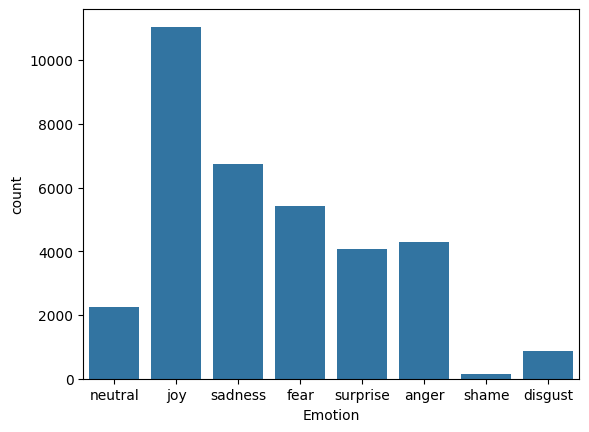

In [6]:

sns.countplot(x='Emotion',data=df)

In [7]:

dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [ ]:

df['Clean_Text'] = df['Text'].apply(nfx.remove_userhandles)
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_stopwords)

In [9]:
label_encoder = LabelEncoder()
y = df['Emotion']
y_encoded = label_encoder.fit_transform(y)


In [10]:
df

,Unnamed: 0,Emotion,Text,Clean_Text
0,0,neutral,Why ?,?
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow.
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL!!! MAN HATE FUNERALS...
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye ! true hazel eye-and brilliant ! Regular f...
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe.. hugggzzz u .! babe naamazed nga ako...
...,...,...,...,...
34787,34787,surprise,@MichelGW have you gift! Hope you like it! It'...,gift! Hope like it! hand wear ! It'll warm! Lol
34788,34788,joy,The world didnt give it to me..so the world MO...,world didnt me..so world DEFINITELY cnt away!!!
34789,34789,anger,A man robbed me today .,man robbed today .
34790,34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO...","Youu JEALOUSY, #Losing YOU..."


In [11]:

Xfeatures = df['Clean_Text']
ylabels = df['Emotion']

In [12]:

x_train, x_test, y_train, y_test = train_test_split(Xfeatures, y_encoded, test_size=0.2, random_state=42)


In [13]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

In [14]:
pipe_lr = Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])
pipe_svc = Pipeline(steps=[('cv', CountVectorizer()), ('svc', SVC(kernel='linear', probability=True))])
pipe_bagging = Pipeline([('tfidf', tfidf_vectorizer), ('bagging', BaggingClassifier(n_estimators=50))])
pipe_lgbm = Pipeline([('tfidf', tfidf_vectorizer), ('lgbm', lgb.LGBMClassifier())])
pipe_et = Pipeline([('tfidf', tfidf_vectorizer), ('et', ExtraTreesClassifier())])

In [15]:
pipe_lr.fit(x_train, y_train)


C:\Users\devas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [16]:
pipe_svc.fit(x_train, y_train)

Pipeline(steps=[('cv', CountVectorizer()),
                ('svc', SVC(kernel='linear', probability=True))])

In [17]:
pipe_lgbm.fit(x_train, y_train)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.129612 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 46216
[LightGBM] [Info] Number of data points in the train set: 27833, number of used features: 1751
[LightGBM] [Info] Start training from score -2.084665
[LightGBM] [Info] Start training from score -3.750870
[LightGBM] [Info] Start training from score -1.866213
[LightGBM] [Info] Start training from score -1.147954
[LightGBM] [Info] Start training from score -2.753549
[LightGBM] [Info] Start training from score -1.640750
[LightGBM] [Info] Start training from score -5.421793
[LightGBM] [Info] Start training from score -2.135335


Pipeline(steps=[('tfidf', TfidfVectorizer(max_features=5000)),
                ('lgbm', LGBMClassifier())])

In [18]:
pipe_et.fit(x_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(max_features=5000)),
                ('et', ExtraTreesClassifier())])

In [19]:
pipe_bagging.fit(x_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(max_features=5000)),
                ('bagging', BaggingClassifier(n_estimators=50))])

In [20]:
y_pred_et = pipe_et.predict(x_test)
y_pred_lgbm = pipe_lgbm.predict(x_test)
y_pred_bagging = pipe_bagging.predict(x_test)


In [21]:

svc_accuracy = pipe_svc.score(x_test, y_test)
lr_accuracy = pipe_lr.score(x_test, y_test)

acc_lgbm = accuracy_score(y_test, y_pred_lgbm)
acc_et = accuracy_score(y_test, y_pred_et)
acc_bagging = accuracy_score(y_test, y_pred_bagging)





In [22]:

print(f"Logistic Regression Accuracy: {lr_accuracy:.4f}")
print(f"SVC Accuracy: {svc_accuracy:.4f}")

print(f"LightGBM Accuracy: {acc_lgbm:.4f}")
print(f"Extra Trees Accuracy: {acc_et:.4f}")
print(f"Bagging Accuracy: {acc_bagging:.4f}")



Logistic Regression Accuracy: 0.6316
SVC Accuracy: 0.6160
LightGBM Accuracy: 0.5851
Extra Trees Accuracy: 0.6323
Bagging Accuracy: 0.6103


In [23]:
estimators_5 = [
    ('extra_trees', pipe_et),
    ('log_reg', pipe_lr),
    ('bagging', pipe_bagging),
    ('svc', pipe_svc),
    ('lgbm', pipe_lgbm)
]

In [24]:

voting_clf = VotingClassifier(estimators=estimators_5, voting='soft')

voting_clf.fit(x_train, y_train)




C:\Users\devas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.607425 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 46216
[LightGBM] [Info] Number of data points in the train set: 27833, number of used features: 1751
[LightGBM] [Info] Start training from score -2.084665
[LightGBM] [Info] Start training from score -3.750870
[LightGBM] [Info] Start training from score -1.866213
[LightGBM] [Info] Start training from score -1.147954
[LightGBM] [Info] Start training from score -2.753549
[LightGBM] [Info] Start training from score -1.640750
[LightGBM] [Info] Start training from score -5.421793
[LightGBM] [Info] Start training from score -2.135335


VotingClassifier(estimators=[('extra_trees',
                              Pipeline(steps=[('tfidf',
                                               TfidfVectorizer(max_features=5000)),
                                              ('et', ExtraTreesClassifier())])),
                             ('log_reg',
                              Pipeline(steps=[('cv', CountVectorizer()),
                                              ('lr', LogisticRegression())])),
                             ('bagging',
                              Pipeline(steps=[('tfidf',
                                               TfidfVectorizer(max_features=5000)),
                                              ('bagging',
                                               BaggingClassifier(n_estimators=50))])),
                             ('svc',
                              Pipeline(steps=[('cv', CountVectorizer()),
                                              ('svc',
                                               SVC(kernel='linear',
                                                   probability=True))])),
                             ('lgbm',
                              Pipeline(steps=[('tfidf',
                                               TfidfVectorizer(max_features=5000)),
                                              ('lgbm', LGBMClassifier())]))],
                 voting='soft')

In [25]:
y_pred = voting_clf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Voting Classifier Accuracy with Top 5 Models: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Voting Classifier Accuracy with Top 5 Models: 0.6462

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.55      0.60       836
           1       0.69      0.18      0.29       202
           2       0.82      0.68      0.74      1104
           3       0.60      0.82      0.69      2214
           4       0.63      0.71      0.67       481
           5       0.62      0.57      0.60      1327
           6       0.85      0.96      0.90        23
           7       0.66      0.40      0.50       772

    accuracy                           0.65      6959
   macro avg       0.69      0.61      0.62      6959
weighted avg       0.66      0.65      0.64      6959



In [26]:

joblib.dump(voting_clf, 'voting_classifier_model.pkl')


print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Confusion Matrix:
 [[ 458    2   27  191   41  102    1   14]
 [  25   37    7   77    2   40    1   13]
 [  47    2  747  184   29   69    0   26]
 [  57    2   54 1825   70  142    1   63]
 [  15    0    8   75  342   36    0    5]
 [  71    6   42  379   37  757    0   35]
 [   0    0    0    0    0    1   22    0]
 [  22    5   24  317   25   69    1  309]]


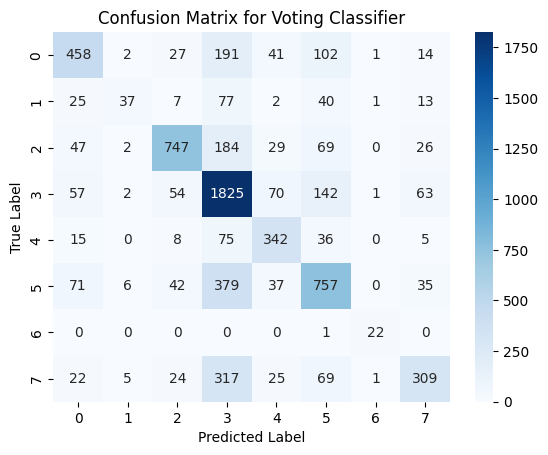

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Voting Classifier")
plt.show()
